In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geodesic_toolbox import *

In [32]:
# Generate data as an annulus
n = 1000
theta = torch.rand(n) * 2 * np.pi
r = torch.sqrt(torch.rand(n) * 0.5 + 0.5)
x = r * torch.cos(theta)
y = r * torch.sin(theta)
X = torch.stack([x, y], dim=1)

In [37]:
cometric = CentroidsCometric(
    centroids=X,
    cometric_centroids=IdentityCoMetric()(X),
    temperature_scale=1,
    temperature=0.005,
)

bounds = get_bounds(X, margin=0.1)
print(cometric)
mf = get_mf_image(cometric, embeddings=X, bounds=bounds, resolution=100)

CentroidsCometric(K=1000, temperature=0.005, temp_scale=1.0 reg_coef=0.001, metric_weight=True, is_diag=True)


Computing magnification factor: 100%|██████████| 20/20 [00:00<00:00, 315.87batch/s]


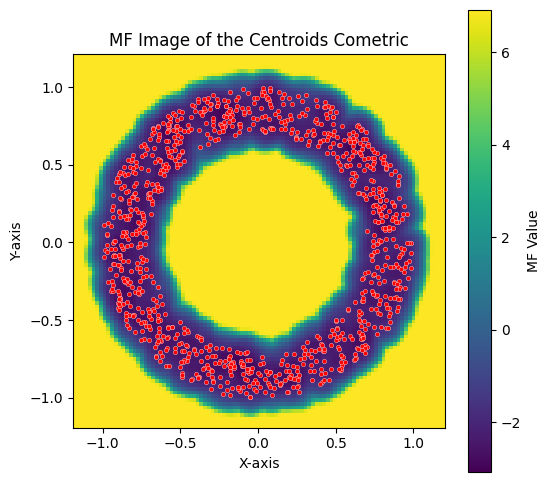

In [38]:
fig, ax = plt.subplots(figsize=(6, 6))
mf_img = ax.imshow(mf.log(), extent=bounds, origin="lower", cmap="viridis")
sns.scatterplot(x=X[:, 0], y=X[:, 1], s=10, color="red", ax=ax)
ax.set_title("MF Image of the Centroids Cometric")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_xlim(bounds[0], bounds[1])
ax.set_ylim(bounds[2], bounds[3])
plt.colorbar(mf_img, ax=ax, label="MF Value")
plt.show()

In [82]:
sampler = ImplicitRHMCSampler(
    cometric=cometric,
    l=10,
    N_fx=5,
    gamma=0.005,
    N_run=100,
    skip_acceptance=False,
)

p0 = X[torch.randint(0, X.shape[0], (1,))]
samples, acc_rate = sampler.sample(p0, progress=True, return_acceptance=True, return_traj=True)
print(f"Acceptance Rate: {acc_rate:.2f}")
print(f"Samples Shape: {samples.shape}")

Sampling: 100%|██████████| 100/100 [00:46<00:00,  2.14steps/s, acceptance_rate=0.92]

Acceptance Rate: 0.92
Samples Shape: torch.Size([1, 101, 2])


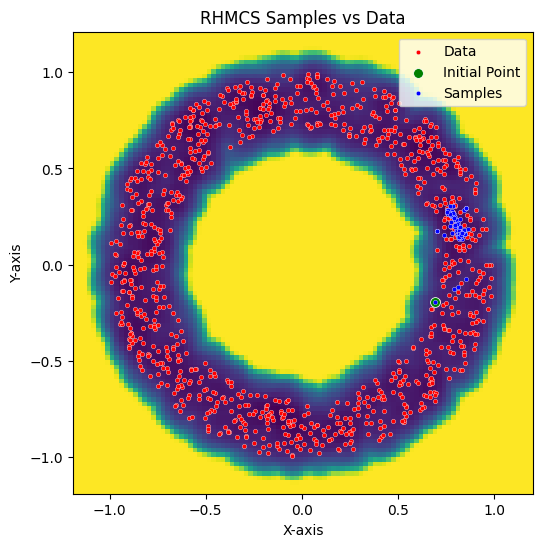

In [83]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(mf.log(), extent=bounds, origin="lower", cmap="viridis")
sns.scatterplot(x=X[:, 0], y=X[:, 1], s=10, color="red", label="Data", ax=ax)
sns.scatterplot(x=p0[:, 0], y=p0[:, 1], s=50, color="green", label="Initial Point", ax=ax)
sns.scatterplot(
    x=samples[0, :, 0], y=samples[0, :, 1], s=10, color="blue", label="Samples", ax=ax
)
ax.set_title("RHMCS Samples vs Data")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
# ax.set_xlim(bounds[0], bounds[1])
# ax.set_ylim(bounds[2], bounds[3])
ax.legend()
plt.show()

In [85]:
explicit_sampler = ExplicitRHMCSampler(
    cometric=cometric,
    l=10,
    gamma=0.005,
    omega=1.0,
    bounds=torch.max(torch.abs(X)) * 1.5,
    N_run=100,
    std_0=0.1,
)

samples_explicit, acc_rate_explicit = explicit_sampler.sample(
    p0, progress=True, return_acceptance=True, return_traj=True
)
print(f"Explicit RHMCS Acceptance Rate: {acc_rate_explicit:.2f}")

Sampling: 100%|██████████| 100/100 [00:20<00:00,  4.89steps/s, acceptance_rate=0.98]

Explicit RHMCS Acceptance Rate: 0.98


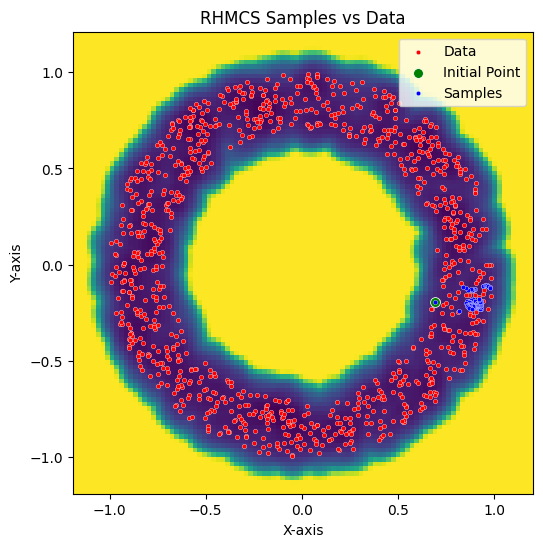

In [86]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(mf.log(), extent=bounds, origin="lower", cmap="viridis")
sns.scatterplot(x=X[:, 0], y=X[:, 1], s=10, color="red", label="Data", ax=ax)
sns.scatterplot(x=p0[:, 0], y=p0[:, 1], s=50, color="green", label="Initial Point", ax=ax)
sns.scatterplot(
    x=samples_explicit[0, :, 0],
    y=samples_explicit[0, :, 1],
    s=10,
    color="blue",
    label="Samples",
    ax=ax,
)
ax.set_title("RHMCS Samples vs Data")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
# ax.set_xlim(bounds[0], bounds[1])
# ax.set_ylim(bounds[2], bounds[3])
ax.legend()
plt.show()